# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

<h4>Imports</h4>

In [1]:
import pandas as pd
from itertools import chain,cycle
from IPython.display import display_html
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import numpy as np
import math

In [2]:
df1=pd.read_excel('imputation_homework_12.xlsx', index_col=0)
df2=pd.read_excel('imputation_homework_32.xls', index_col=0)
df3=pd.read_excel('imputation_homework_78.xlsx', index_col=0)

In [3]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [4]:
display_side_by_side(df1,df2,df3, titles=['home_work12','home_work32', 'home_work78'])

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00
5,NaN,11.25
6,1.70,11.50
7,1.75,11.75
8,1.80,12.00
9,1.85,12.25


<h6>1. Count the number of missing values in the dataframe; count the number of missing values per column</h6>

In [5]:
print("Dataframe1 Null values")
print(df1.isna().sum(), "\n")
print("Dataaframe2 Null Values")
print(df2.isna().sum(), "\n")
print("Dataframe3 Null values")
print(df3.isna().sum())

Dataframe1 Null values
x    9
y    0
dtype: int64 

Dataaframe2 Null Values
time      0
value    48
dtype: int64 

Dataframe3 Null values
date      0
value    81
dtype: int64


<h6>2.Plot the distribution of data points using a histogram</h6>
<li>Dataframe1 histogram</li>

<AxesSubplot:xlabel='y', ylabel='Count'>

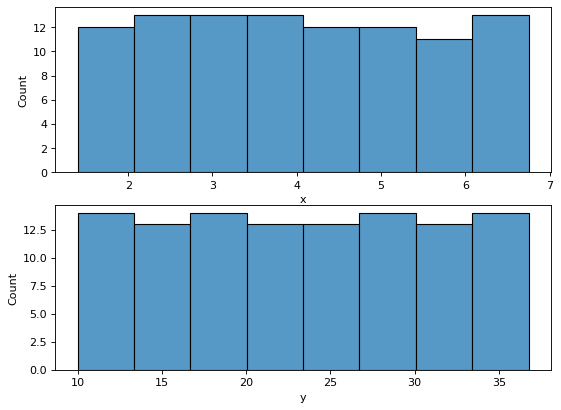

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2, 1, 1)
sns.histplot(data=df1, x="x")
plt.subplot(2, 1, 2)
sns.histplot(data=df1, x="y")

<li>Dataframe2 histogram</li>

<AxesSubplot:xlabel='value', ylabel='Count'>

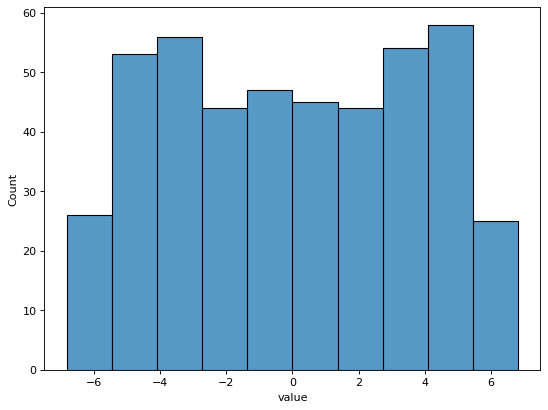

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data=df2, x="value")

<li>Dataframe3 histogram</li>

<AxesSubplot:xlabel='value', ylabel='Count'>

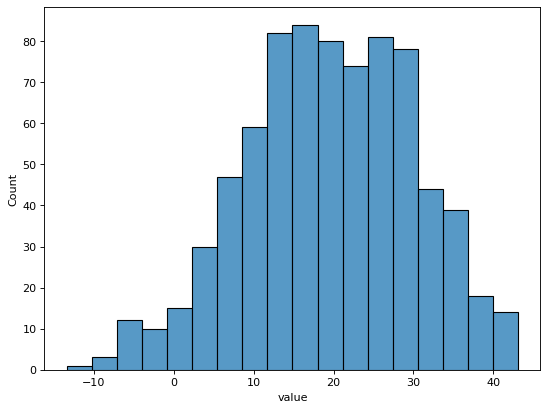

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(data=df3, x="value")

<h6>3.Create a lag plot (a lag plot shows t versus t+1)</h6>
<li>Lagplot for dataframe1</li>

Text(0.5, 1.0, 'Autocorrelation for dataframe1')

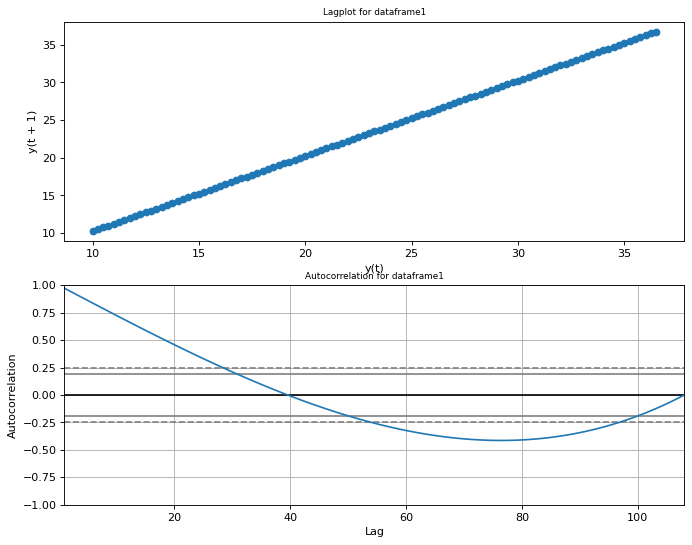

In [9]:
plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(2, 1, 1)
pd.plotting.lag_plot(df1['y'])
plt.title("Lagplot for dataframe1", size=8)
plt.subplot(2, 1, 2)
pd.plotting.autocorrelation_plot(df1['y']);
plt.title("Autocorrelation for dataframe1", size=8)

<li>Perfect Positive Correlation</li>
<li>Missing data can be imputed using linear interplotation</li>
<li>Order Matters</li>

<h6>Lagplot and autocorrelation for dataframe2</h6>

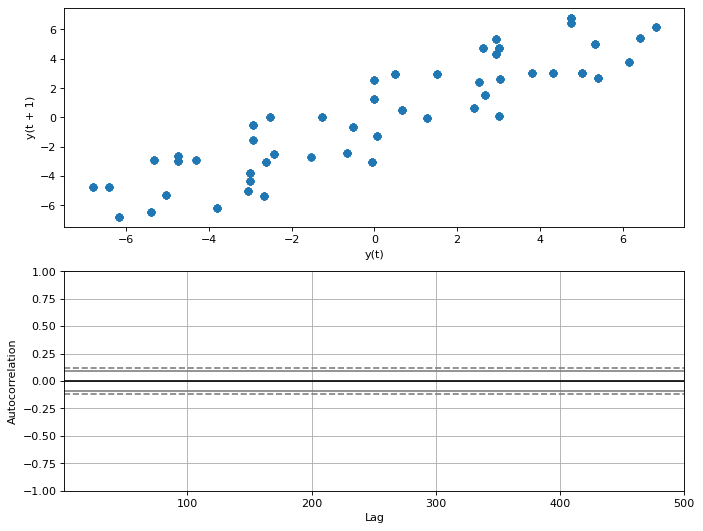

In [10]:
plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(2, 1, 1)
pd.plotting.lag_plot(df2['value']);
plt.subplot(2, 1, 2)
pd.plotting.autocorrelation_plot(df2['value']);

<li>Data is not correlated but there is a seasonality in the data</li>
<li>Order matters</li>

<h6>Lagplot and autocorrelation for dataframe3</h6>

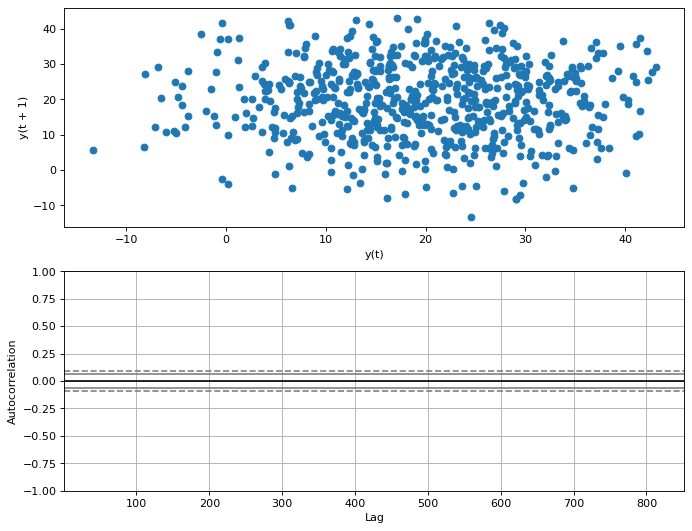

In [11]:
plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(2, 1, 1)
pd.plotting.lag_plot(df3['value']);
plt.subplot(2, 1, 2)
pd.plotting.autocorrelation_plot(df3['value']);

<li>There is no correlation in the data</li>
<li>data is random</li>
<li>Order doesn't matter</li>

<h6>4.Based on the lag plot, state in a markdown cell whether the order of this data matters.</h6>
<li>In Dataframe1, data is linear hence order matters</li>
<li>In Dataframe2 data is repeated at regular intervals, so order of the data matters</li>
<li>In Dataframe3 data is random hence the order doesn't matter</li>

<h6>5A.If the order of the data matters, then interpolate the missing values</h6>
<li>For Dataframe1</li>

In [12]:
df1=df1.interpolate(method ='linear', limit_direction ='forward')
df1.isna().sum()

x    0
y    0
dtype: int64

<h6>5B.If the order of the data does not matter, fill in the missing data by sampling from the distribution</h6>
<li>for Dataframe1</li>

In [13]:
df2['new_time'] = df2['time'].apply(lambda row: str(round(row, 2)).split('.')[1])
df2['value'] = df2.groupby("new_time")['value'].transform(lambda x: x.fillna(x.mean()))
df2.drop('new_time', 1, inplace=True)

C:\Users\dhssr\AppData\Local\Temp/ipykernel_1852/3223313816.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2.drop('new_time', 1, inplace=True)


<h6>5A.Imputing missing values in dataframe3 with interpolation using padding</h6>

In [14]:
df3=df3.interpolate(method='pad')
df3.isna().sum()

date     0
value    0
dtype: int64

<h6>Scatter Plot after imputing null values</h6>

Text(0.5, 1.0, 'Dataframe3 scatter plot')

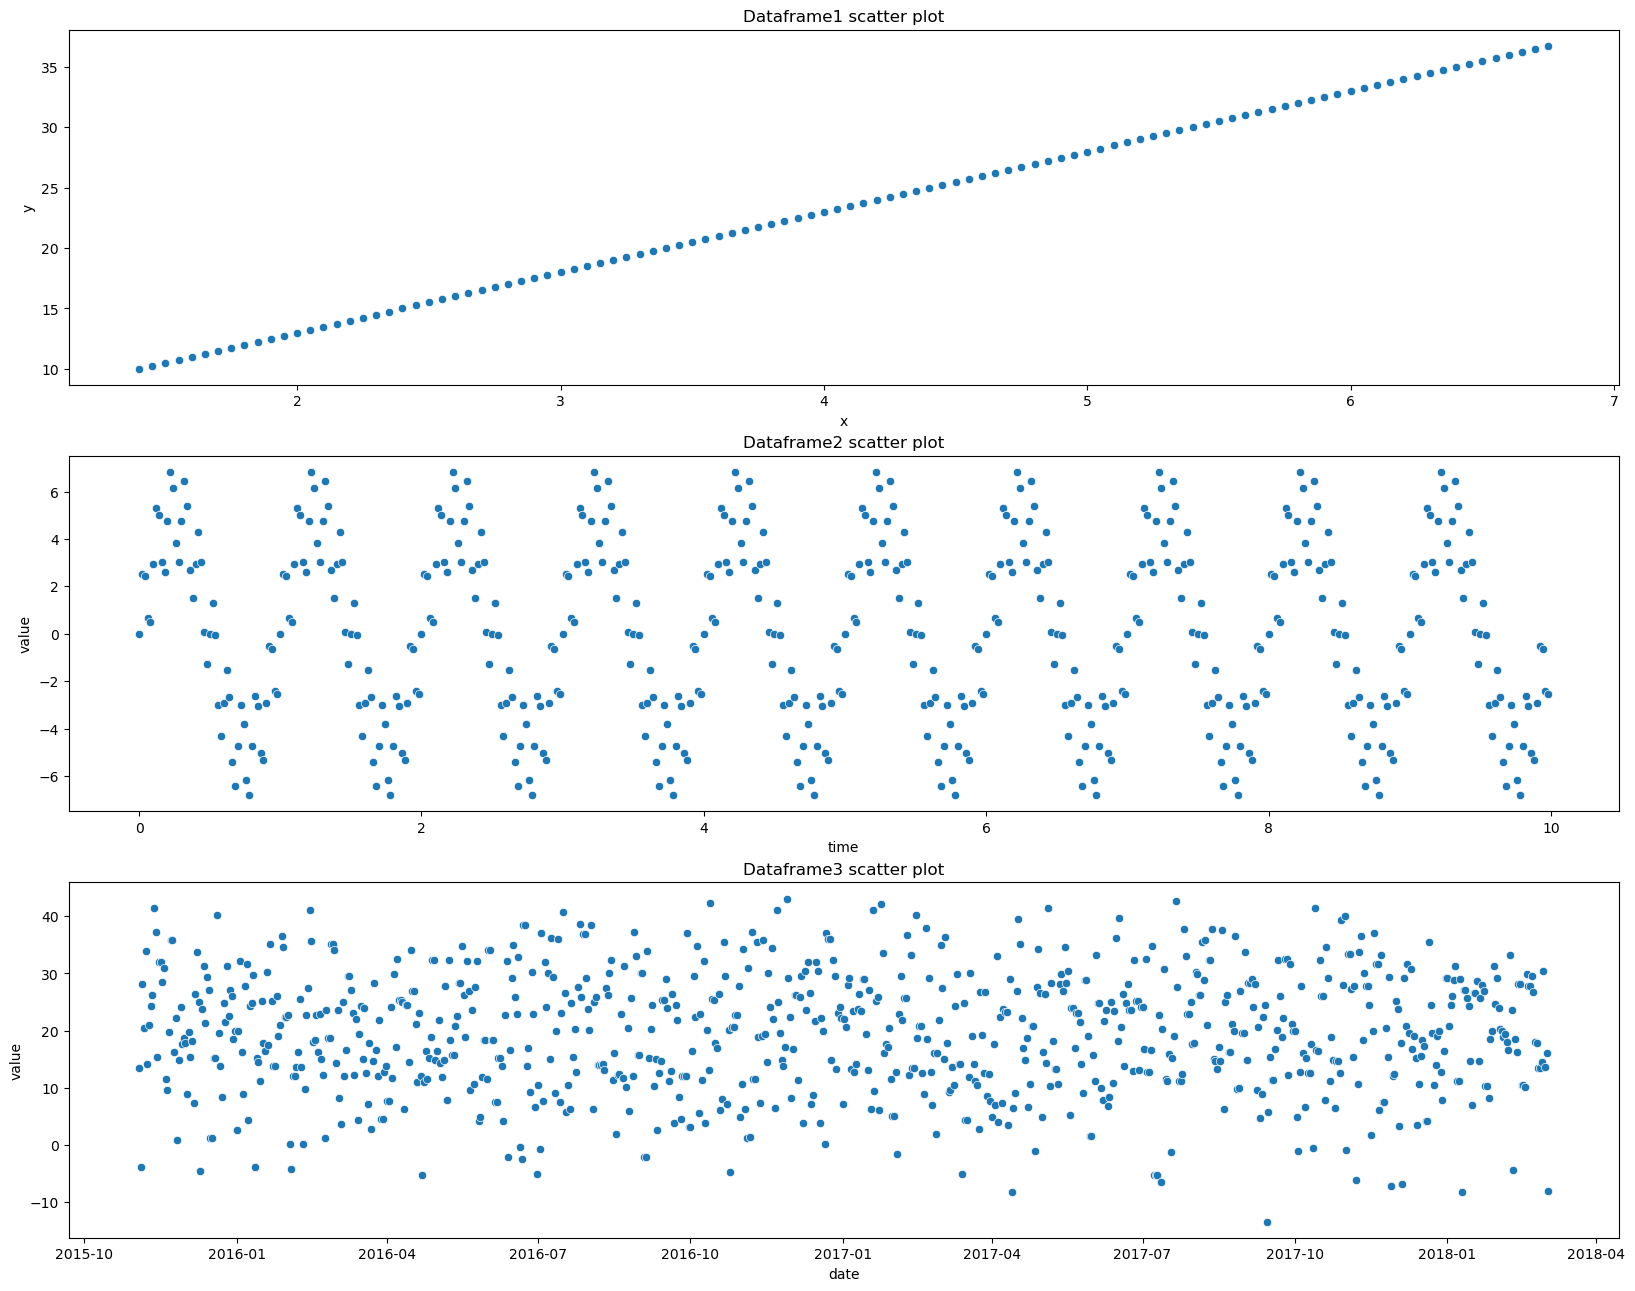

In [15]:
plt.figure(figsize=(20, 16), dpi=100)
plt.subplot(3, 1, 1)
sns.scatterplot(data=df1, x="x", y="y")
plt.title("Dataframe1 scatter plot")
plt.subplot(3, 1, 2)
sns.scatterplot(data=df2, x="time", y="value")
plt.title("Dataframe2 scatter plot")
plt.subplot(3, 1, 3)
sns.scatterplot(data=df3, x="date", y="value")
plt.title("Dataframe3 scatter plot")

Reference:
https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side